# evaluation

In [7]:
import os
import torch
import glob
import numpy as np

from diffusion.evaluations import DiffusionEvaluator
from diffusion.vae import SimpleVAE
from diffusion.script_util import get_vae_mnist_kwargs
from diffusion.lightning_modules import MNISTDataModule, DiffusionWithModel
from diffusion.vgg5 import VGG5
from diffusion.data_util import show_out_images

In [8]:
vae_ckpt_path = r'C:\Users\niels\local_data\bachelor\eval_models\vae.ckpt'
classifier_ckpt_path = r'C:\Users\niels\local_data\bachelor\eval_models\classifier.ckpt'

model_ckpt_paths = glob.glob(r'C:\Users\niels\local_data\bachelor\models\cond-scheduled-var-42\lightning_logs\version_0\checkpoints\*.ckpt', recursive=True)
model_ckpt_paths                                                         #predicted scheduled

['C:\\Users\\niels\\local_data\\bachelor\\models\\cond-scheduled-var-42\\lightning_logs\\version_0\\checkpoints\\epoch-epoch=99-val_loss=0.01232.ckpt',
 'C:\\Users\\niels\\local_data\\bachelor\\models\\cond-scheduled-var-42\\lightning_logs\\version_0\\checkpoints\\last-epoch=99-val_loss=0.01232.ckpt',
 'C:\\Users\\niels\\local_data\\bachelor\\models\\cond-scheduled-var-42\\lightning_logs\\version_0\\checkpoints\\last.ckpt',
 'C:\\Users\\niels\\local_data\\bachelor\\models\\cond-scheduled-var-42\\lightning_logs\\version_0\\checkpoints\\loss-epoch=72-val_loss=0.01225.ckpt',
 'C:\\Users\\niels\\local_data\\bachelor\\models\\cond-scheduled-var-42\\lightning_logs\\version_0\\checkpoints\\loss-epoch=85-val_loss=0.01213.ckpt',
 'C:\\Users\\niels\\local_data\\bachelor\\models\\cond-scheduled-var-42\\lightning_logs\\version_0\\checkpoints\\loss-epoch=93-val_loss=0.01220.ckpt']

In [9]:
def print_logger(log, value: torch.Tensor, *args, **kwargs):
    print(f'log {log}:', value) # value.detach().cpu().numpy())

device = 'cuda' if torch.cuda.is_available() else 'cpu'

vae = SimpleVAE.load_from_checkpoint(vae_ckpt_path).to(device).eval()
classifier = VGG5.load_from_checkpoint(classifier_ckpt_path).to(device).eval()

combined_model = DiffusionWithModel.load_from_checkpoint(model_ckpt_paths[-2]).to(device)
unet, diffusion = combined_model.extract_models()


hardware_kwargs=get_vae_mnist_kwargs('local')
work_dir = hardware_kwargs.pop('work_dir')
data_dir = os.path.join(work_dir, 'datasets')
data_module = MNISTDataModule(
    data_dir=data_dir,
    batch_size=hardware_kwargs.pop('batch_size'),
    num_workers=hardware_kwargs.pop('num_workers')
)
data_module.prepare_data()
data_module.setup('fit')
val_loader = data_module.val_dataloader()


evaluator = DiffusionEvaluator(
    logger=print_logger,
    dataloader=val_loader,
    unet=unet,
    diffusion=diffusion,
    vae=vae,
    classifier=classifier,
    n_sampling_tests=256*4
)

c:\Users\niels\anaconda3\envs\bachelor\lib\site-packages\pytorch_lightning\utilities\migration\utils.py:49: PossibleUserWarning: The loaded checkpoint was produced with Lightning v1.9.4, which is newer than your current Lightning version: v1.9.3
  rank_zero_warn(


In [10]:
evaluator.do_all_tests(show_progress=True)

Starting classifier acc test
Getting accuracy
Starting sampling
batch_sizes: 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16


100%|██████████| 64/64 [00:01<00:00, 62.36it/s]

log top_1_acc: tensor(0.9834, device='cuda:0')
log top_2_acc: tensor(0.9951, device='cuda:0')
log top_3_acc: tensor(0.9971, device='cuda:0')
log top_4_acc: tensor(0.9990, device='cuda:0')
log top_5_acc: tensor(0.9990, device='cuda:0')
log top_6_acc: tensor(0.9990, device='cuda:0')
log top_7_acc: tensor(0.9990, device='cuda:0')
log top_8_acc: tensor(0.9990, device='cuda:0')
log top_9_acc: tensor(1., device='cuda:0')
Preparing evaluator


Encoding dataset


100%|██████████| 79/79 [00:05<00:00, 14.17it/s]

Label based computations



100%|██████████| 10/10 [00:00<00:00, 1671.44it/s]

Starting FVAED test
Computing FVAED



100%|██████████| 64/64 [00:00<00:00, 567.90it/s]

log FVAED: 0.12282180786132812
Computing class based FVAD



100%|██████████| 10/10 [00:00<00:00, 716.19it/s]

log FVAED_0: 0.7463264465332031
log FVAED_1: 0.3822517395019531
log FVAED_2: 0.4876556396484375
log FVAED_3: 0.5449066162109375
log FVAED_4: 0.4284839630126953
log FVAED_5: 0.6833229064941406
log FVAED_6: 0.47266197204589844
log FVAED_7: 0.41822147369384766
log FVAED_8: 0.49968433380126953
log FVAED_9: 0.5060758590698242


In [4]:
evaluator.do_all_tests(show_progress=True)

Starting classifier acc test
Getting accuracy
Starting sampling
batch_sizes: 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16


100%|██████████| 64/64 [00:01<00:00, 63.37it/s]

log top_1_acc: tensor(0.9746, device='cuda:0')
log top_2_acc: tensor(0.9902, device='cuda:0')
log top_3_acc: tensor(0.9902, device='cuda:0')
log top_4_acc: tensor(0.9951, device='cuda:0')
log top_5_acc: tensor(0.9961, device='cuda:0')
log top_6_acc: tensor(0.9990, device='cuda:0')
log top_7_acc: tensor(1., device='cuda:0')
log top_8_acc: tensor(1., device='cuda:0')
log top_9_acc: tensor(1., device='cuda:0')
Preparing evaluator
Encoding dataset



100%|██████████| 79/79 [00:05<00:00, 15.43it/s]

Label based computations



100%|██████████| 10/10 [00:00<00:00, 1671.64it/s]

Starting FVAED test
Computing FVAED



100%|██████████| 64/64 [00:00<00:00, 588.73it/s]

log FVAED: 0.1334056854248047
Computing class based FVAD



100%|██████████| 10/10 [00:00<00:00, 835.69it/s]

log FVAED_0: 0.7074451446533203
log FVAED_1: 0.252532958984375
log FVAED_2: 0.31488990783691406
log FVAED_3: 0.5778865814208984
log FVAED_4: 0.4060249328613281
log FVAED_5: 0.9667568206787109
log FVAED_6: 0.2753171920776367
log FVAED_7: 0.4320697784423828
log FVAED_8: 0.4246673583984375
log FVAED_9: 0.6134176254272461


In [ ]:
show_out_images(diffusion.)

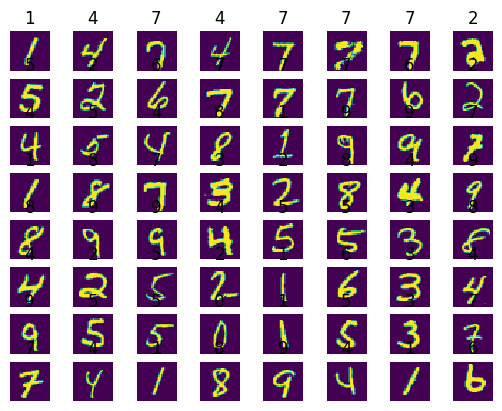

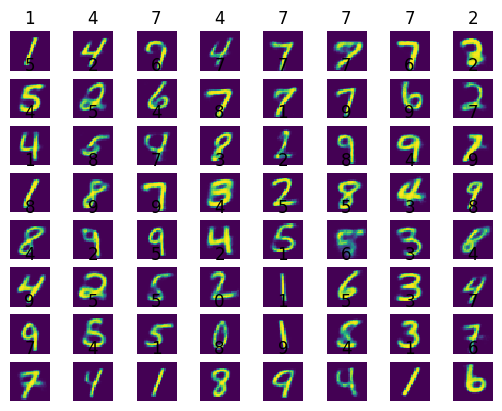

In [5]:
from diffusion.data_util import show_out_images
data_loader = iter(val_loader)
x, y = next(data_loader)
show_out_images(x, y)
x_pred = vae(x.to('cuda'))
show_out_images(torch.nn.Sigmoid()(x_pred), y)

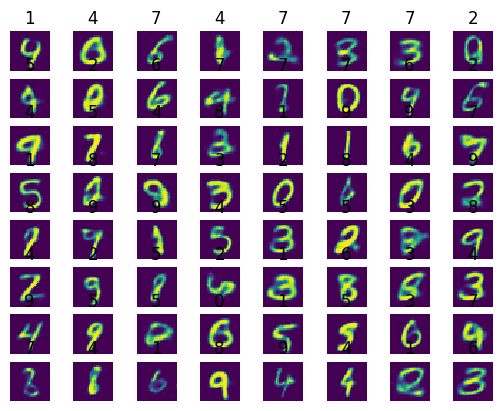

In [6]:
samples = vae.sample_prior(64)
show_out_images(torch.nn.Sigmoid()(samples), y)

In [1]:
import torch

c:\Users\niels\anaconda3\envs\bachelor\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
a = torch.tensor((2.,), requires_grad = True)
b = torch.tensor((3.,), requires_grad = True)
c = torch.tensor((5.,), requires_grad = True)
d = torch.tensor((7.,), requires_grad = True)

loss1 = a*b.detach()
loss2 = c*d
loss = (loss1 + loss2) * torch.tensor((-1.,), requires_grad = True)

print(a, b, c, d)
loss.backward()
print(a.grad, b.grad, c.grad, d.grad)

tensor([2.], requires_grad=True) tensor([3.], requires_grad=True) tensor([5.], requires_grad=True) tensor([7.], requires_grad=True)
tensor([-3.]) None tensor([-7.]) tensor([-5.])


tensor([3.])